In [1561]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [1562]:
x = np.random.randint(-10,10,100)
y = np.random.randint(-10,10,100)
z = np.random.randint(0,10,100)

In [1563]:
x1 = [0,0,4,4,0,0,0,0,4,4,4,4,4,4,0,0,0]
y1 = [0,4,4,0,0,0,0,4,4,4,4,0,0,0,0,4,4]
z1 = [0,0,0,0,0,0,4,6,6,0,6,4,0,4,4,6,0]

In [1564]:
df = pd.DataFrame(data=[x1,y1,z1], index=['x','y','z']).transpose()
o1 = {'x':0, 'y':0, 'z':0}

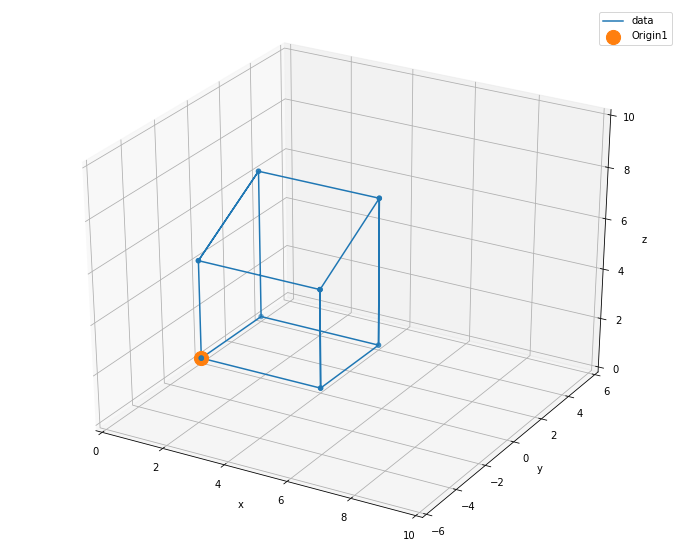

In [1565]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['x'],df['y'],df['z'])
ax.scatter(o1['x'],o1['y'],o1['z'], s=200,c='C1')
ax.scatter(x1,y1,z1, c='C0')
ax.plot(x1, y1, z1, zdir='z', c='C0')
ax.legend(['data', 'Origin1'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(0,10)
ax.set_ylim(-6,6)
ax.set_zlim(0,10)
fig.set_size_inches(12, 10)
plt.show()

In [1566]:
o2 = {'x':5, 'y':-5, 'z':0}

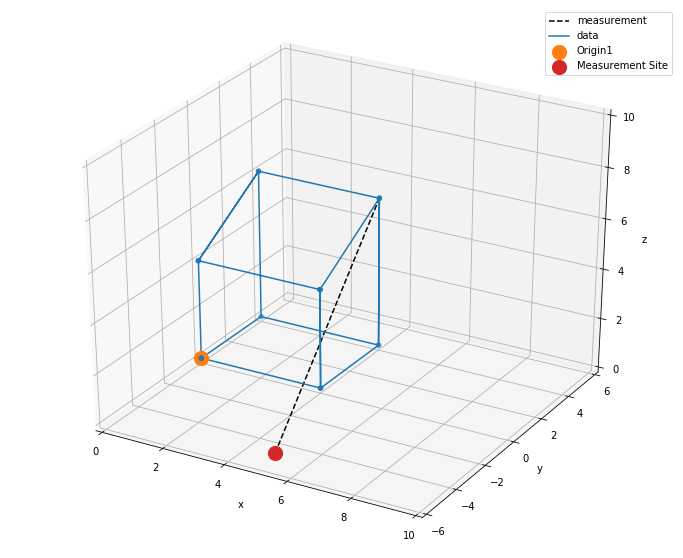

In [1584]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(o1['x'],o1['y'],o1['z'], s=200,c='C1')
ax.scatter(o2['x'],o2['y'],o2['z'], s=200, c='C3')
ax.scatter(x1,y1,z1, c='C0')
ax.plot([o2['x'],4],[o2['y'],4],[o2['z'],6], ls='--', c='k')
ax.plot(x1, y1, z1, zdir='z', c='C0')
ax.legend(['measurement','data', 'Origin1', 'Measurement Site'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(0,10)
ax.set_ylim(-6,6)
ax.set_zlim(0,10)
fig.set_size_inches(12, 10)
plt.show()

In [1568]:
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(df['x'],df['y'],df['z'])
# ax.scatter(o1['x'],o1['y'],o1['z'], s=50)
# ax.scatter(o2['x'],o2['y'],o2['z'], s=50, c='C3')
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.set_zlabel('z')
# ax.legend(['data', 'Origin1', 'Origin2'])
# fig.set_size_inches(12, 10)
# plt.show()

In [1585]:
# calculate radius from origin2
df['r_meas'] = np.sqrt((df['x'] - o2['x'])**2 + (df['y'] - o2['y'])**2 + (df['z'] - o2['z'])**2)
# calculate polar angle from origin2
df['theta_meas'] = np.arccos((df['z'] - o2['z'])/df['r_meas'])
# calculate azimuthal angle from origin2
df['phi_meas'] = np.arctan2((df['y'] - o2['y']),(df['x'] - o2['x']))

In [1586]:
df.head(5)

,x,y,z,r_meas,theta_meas,phi_meas,x_meas,y_meas,z_meas
0,0,0,0,7.071068,1.570796,2.356194,-5.0,5.0,4.329780e-16
1,0,4,0,10.295630,1.570796,2.077895,-5.0,9.0,6.304255e-16
2,4,4,0,9.055385,1.570796,1.681454,-1.0,9.0,5.544824e-16
3,4,0,0,5.099020,1.570796,1.768192,-1.0,5.0,3.122249e-16
4,0,0,0,7.071068,1.570796,2.356194,-5.0,5.0,4.329780e-16


In [1587]:
# calculate x from origin2
df['x_meas'] = df['r_meas']*np.sin(df['theta_meas'])*np.cos(df['phi_meas'])
# calculate y from origin2
df['y_meas'] = df['r_meas']*np.sin(df['theta_meas'])*np.sin(df['phi_meas'])
# calculate z from origin2
df['z_meas'] = df['r_meas']*np.cos(df['theta_meas'])

In [1588]:
df.head(5)

,x,y,z,r_meas,theta_meas,phi_meas,x_meas,y_meas,z_meas
0,0,0,0,7.071068,1.570796,2.356194,-5.0,5.0,4.329780e-16
1,0,4,0,10.295630,1.570796,2.077895,-5.0,9.0,6.304255e-16
2,4,4,0,9.055385,1.570796,1.681454,-1.0,9.0,5.544824e-16
3,4,0,0,5.099020,1.570796,1.768192,-1.0,5.0,3.122249e-16
4,0,0,0,7.071068,1.570796,2.356194,-5.0,5.0,4.329780e-16


In [1571]:
x1 = [0,0,4,4,0,0,0,0,4,4,4,4,4,4,0,0,0]
y1 = [0,4,4,0,0,0,0,4,4,4,4,0,0,0,0,4,4]
z1 = [0,0,0,0,0,0,4,6,6,0,6,4,0,4,4,6,0]

test_df = pd.DataFrame(data=[x_test,y_test,z_test], index=['x','y','z']).transpose()

In [1574]:
o2_est = {'x':np.mean(df['x'] - df['x_meas']), \
          'y':np.mean(df['y'] - df['y_meas']), \
          'z':np.mean(df['z'] - df['z_meas'])}
o2_est

{'x': 5.0, 'y': -5.0, 'z': -2.525411628910291e-16}

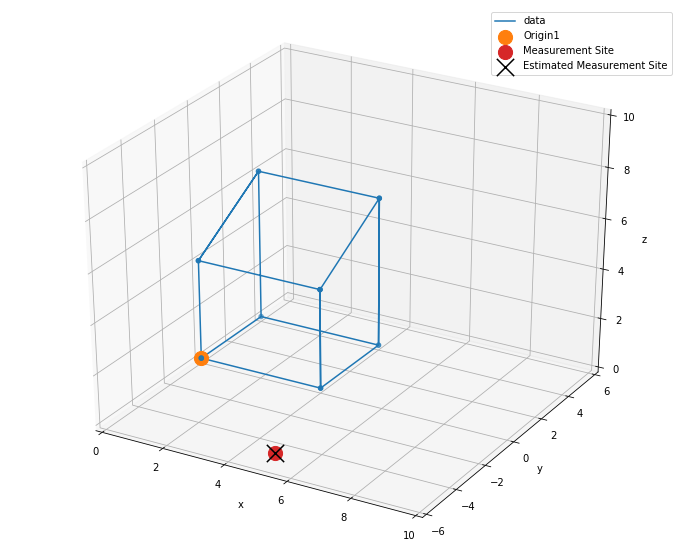

In [1595]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(o1['x'],o1['y'],o1['z'], s=200,c='C1')
ax.scatter(o2['x'],o2['y'],o2['z'], s=200, c='C3')
ax.scatter(o2_est['x'],o2_est['y'],o2_est['z'], s=300, c='k', marker="x")
ax.scatter(x1,y1,z1, c='C0')
ax.plot(x1, y1, z1, zdir='z', c='C0')
ax.legend(['data', 'Origin1', 'Measurement Site', 'Estimated Measurement Site'])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(0,10)
ax.set_ylim(-6,6)
ax.set_zlim(0,10)
fig.set_size_inches(12, 10)
plt.show()

In [1575]:
# Define x,y,z from o2_estimated
test_df['x_meas'] = test_df['x'] - o2_est['x']
test_df['y_meas'] = test_df['y'] - o2_est['y'] 
test_df['z_meas'] = test_df['z'] - o2_est['z'] 

test_df['r_meas'] = np.sqrt((test_df['x_meas'])**2 + (test_df['y_meas'])**2 + (test_df['z_meas'])**2)
# calculate polar angle from origin2
test_df['theta_meas'] = np.arccos((test_df['z_meas'])/test_df['r_meas'])
# calculate azimuthal angle from origin2
test_df['phi_meas'] = np.arctan2((test_df['y_meas']),(test_df['x_meas']))

# calculate cartesian estimates from spherical
test_df['x_est'] = test_df['r_meas']*np.sin(test_df['theta_meas'])*np.cos(test_df['phi_meas']) + o2_est['x']
# calculate y from origin2
test_df['y_est'] = test_df['r_meas']*np.sin(test_df['theta_meas'])*np.sin(test_df['phi_meas']) + o2_est['y']
# calculate z from origin2
test_df['z_est'] = test_df['r_meas']*np.cos(test_df['theta_meas']) + o2_est['z']


test_df.head()

,x,y,z,x_meas,y_meas,z_meas,r_meas,theta_meas,phi_meas,x_est,y_est,z_est
0,-1,6,1,-6.0,11.0,1.0,12.569805,1.491156,2.070143,-1.000000e+00,6.0,1.0
1,8,-7,2,3.0,-2.0,2.0,4.123106,1.064352,-0.588003,8.000000e+00,-7.0,2.0
2,0,6,7,-5.0,11.0,7.0,13.964240,1.045718,1.997424,1.776357e-15,6.0,7.0
3,-8,-9,1,-13.0,-4.0,1.0,13.638182,1.497407,-2.843094,-8.000000e+00,-9.0,1.0
4,9,5,8,4.0,10.0,8.0,13.416408,0.931931,1.190290,9.000000e+00,5.0,8.0


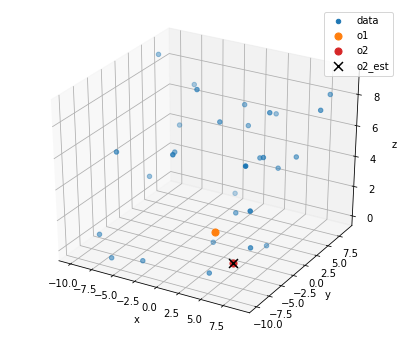

In [1576]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(test_df['x'],test_df['y'],test_df['z'])
ax.scatter(o1['x'],o1['y'],o1['z'], s=50)
ax.scatter(o2['x'],o2['y'],o2['z'], s=50, c='C3')
ax.scatter(o2_est['x'],o2_est['y'],o2_est['z'], s=80, c='k', marker="x")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend(['data', 'o1', 'o2', 'o2_est'])
fig.set_size_inches(7, 6)
plt.show()

In [1577]:
def xyz_from_meas(r,theta,phi,meas_origin):
    
    cart = {}
    
    cart['x'] = r*np.sin(theta)*np.cos(phi) + meas_origin['x']
    cart['y'] = r*np.sin(theta)*np.sin(phi) + meas_origin['y']
    cart['z'] = r*np.cos(theta) + meas_origin['z']
    
    return(cart)

In [1578]:
xyz_from_meas(6.403124, 0.896055, 2.498092, o2_est)

{'x': 1.0000000133420865, 'y': -2.000002855027405, 'z': 4.000001774533228}